In [1]:
import networkx as nx
from karateclub import DeepWalk
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Number of nodes (club-members):  34


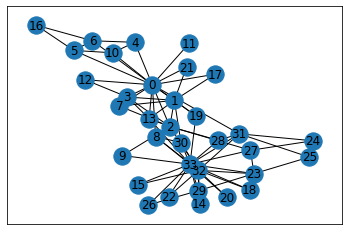

In [2]:
G = nx.karate_club_graph()
print("Number of nodes (club-members): ", len(G.nodes))
nx.draw_networkx(G)

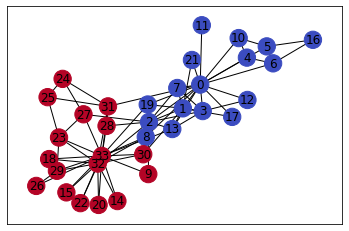

In [3]:
# Plot the graph wth labels
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) # clubs: 'Officer' or 'Mr.Hi'

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, node_color = labels, cmap='coolwarm', pos = layout_pos)

In [4]:
# Perform node embedding using DeepWalk
Deepwalk_model = DeepWalk(walk_number = 10, walk_length = 80, dimensions = 128)
Deepwalk_model.fit(G)

embedding = Deepwalk_model.get_embedding()
print("Embedding array shape (nodes x features): ", embedding.shape)

Embedding array shape (nodes x features):  (34, 128)


Low dimensional embedding representation (nodes x 2):  (34, 2)


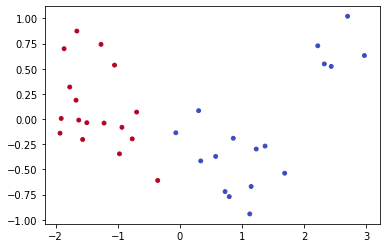

In [5]:
# Low dimensional plot ofthe nodes x features
PCA_model = sklearn.decomposition.PCA(n_components=2)
low_dimension_embedding = PCA_model.fit_transform(embedding)
print("Low dimensional embedding representation (nodes x 2): ", low_dimension_embedding.shape)
plt.scatter(low_dimension_embedding[:,0], low_dimension_embedding[:,1], c=labels, cmap='coolwarm', s=15)

In [6]:
# Node classification using embedded model
x_train, x_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.3)
ml_model = LogisticRegression(random_state = 0).fit(x_train, y_train)
y_predict = ml_model.predict(x_test)
ml_accuracy = roc_auc_score(y_test, y_predict)
print("AUC: ", ml_accuracy)

AUC:  0.9
